## Preprocesamiento de datos

In [63]:
import pandas as pd 

df = pd.read_csv('data/Client_segment_MODIFICADO.csv', sep=';', encoding='ISO-8859-1')

dict_prov = {'i\x81vila': 'Avila', 'Almeri\xada': 'Almeria', 'i\x81lava': 'Alava', 'La Corui±a': 'La Coruña', 'Guipiºzcoa': 'Guipuzcoa'}

for key, value in dict_prov.items():
    df['Provincia'] = df['Provincia'].replace(key, value)

print(len(df))
df

10806


,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos anuales brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
0,CLI2,M,No,24,No,Funcionario,<10annos,Bajo,4,2000,Generacion Z,13945,Malaga,"1,029",30,0,278,NaN
1,CLI3,F,Si,42,Si,Ingeniero,+20annos,Medio,3,1982,Millennials,118107,Salamanca,"1,79",30,0,455,3
2,CLI4,F,Si,74,Si,Ingeniero,+20annos,Bajo,1,1950,Generacion X,53533,Burgos,"1,326",50,0,380,1
3,CLI5,M,Si,74,Si,Servicios,+20annos,Alto,2,1950,Generacion X,82273,Gerona,"0,779",50,1,387,3
4,CLI6,F,Si,44,Si,Otros,+20annos,Alto,6,1980,Generacion X,90776,Avila,"1,767",30,1,299,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,CLI10803,F,No,35,Si,Funcionario,10-20annos,Bajo,1,1989,Millennials,22751,Madrid,"1,675",30,0,212,NaN
10802,CLI10804,M,No,34,No,Funcionario,10-20annos,Bajo,5,1990,Millennials,29184,Madrid,"1,836",30,1,210,NaN
10803,CLI10805,F,No,46,Si,Negocios/empresa,+20annos,Bajo,1,1978,Generacion X,69622,Madrid,"1,189",50,0,363,"0,5"
10804,CLI10806,M,Si,46,Si,Otros,+20annos,Medio,4,1978,Generacion X,49328,Madrid,"1,346",30,0,140,NaN


### Valores Nulos

In [64]:
df_nulls = pd.DataFrame(df.isnull().sum(), index=df.columns, columns=['Nulos'])
df_nulls

,Nulos
ID,0
Genero,0
Casado,190
Edad,0
Graduado,103
Profesion,0
Experiencia laboral,0
Gastoscore,0
Family_Size,0
anno_nacimiento,0


In [65]:
null_df = df[['Casado', 'Graduado', 'Campanna_anno']]
null_df

,Casado,Graduado,Campanna_anno
0,No,No,NaN
1,Si,Si,3
2,Si,Si,1
3,Si,Si,3
4,Si,Si,NaN
...,...,...,...
10801,No,Si,NaN
10802,No,No,NaN
10803,No,Si,"0,5"
10804,Si,Si,NaN


Vamos a ver la distribucion de Campanna_anno

count     5099
unique       4
top          3
freq      1865
Name: Campanna_anno, dtype: object


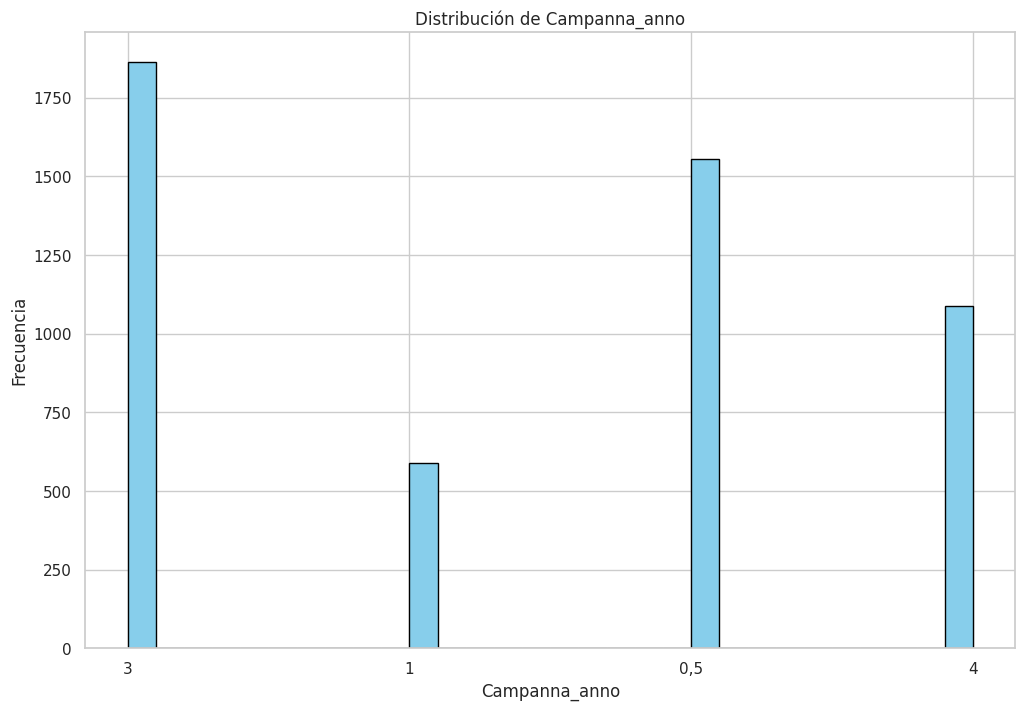

In [66]:
import matplotlib.pyplot as plt

# Estadísticas básicas
print(df['Campanna_anno'].describe())

# Visualización
plt.hist(df['Campanna_anno'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Campanna_anno')
plt.xlabel('Campanna_anno')
plt.ylabel('Frecuencia')
plt.show()

Vemos que los valores de esta columna son siempre 0.5, 1, 3 o 4, lo que nos indica que puede ser interpretada como una variable categorica. No obstante vamos a sustituir los valores faltantes por 0 ya que se entiende que el descuento en ese año hacia el cliente no ha existido, es decir, es 0.

In [67]:
df.fillna({'Campanna_anno': 0}, inplace=True)
df.dropna(subset=['Casado', 'Graduado'], inplace=True)
df.drop(columns=['ID'], inplace=True)

df_nulls = pd.DataFrame(df.isnull().sum(), index=df.columns, columns=['Nulos'])
df_nulls

,Nulos
Genero,0
Casado,0
Edad,0
Graduado,0
Profesion,0
Experiencia laboral,0
Gastoscore,0
Family_Size,0
anno_nacimiento,0
Generacion,0


# PCA

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Seleccionar columnas numéricas excluyendo identificadores
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_cols])

# Convertir a DataFrame para mayor claridad
df_scaled = pd.DataFrame(X_scaled, columns=numerical_cols)
print("\nDatos estandarizados:")
df_scaled.head()


Datos estandarizados:


,Edad,Family_Size,anno_nacimiento,Ingresos anuales brutos,Gasto_medio_mensual_cuota,Abandono,Dias_cliente
0,-1.300860,0.800459,1.301125,-1.191091,-0.533818,-0.653557,-0.134697
1,-0.322339,0.153473,0.322587,1.748679,-0.533818,-0.653557,1.055353
2,1.417255,-1.140499,-1.417036,-0.073796,0.170131,-0.653557,0.551095
3,1.417255,-0.493513,-1.417036,0.737334,0.170131,1.530088,0.598159
4,-0.213614,2.094431,0.213861,0.977315,-0.533818,1.530088,0.006495


Ahora ya con los datos estandarizados y las columnas numericas podemos aplicar el PCA

In [69]:
# Inicializar PCA con 2 componentes
pca = PCA(n_components=3)

# Ajustar PCA a los datos estandarizados y transformar los datos
principal_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PCA3'])

# No hay una columna 'Class', así que no la concatenamos
final_df = pca_df

print("\nComponentes principales:")
final_df.head()


Componentes principales:


,PC1,PC2,PCA3
0,-2.361625,-0.377032,0.309793
1,0.229278,-1.275678,0.542749
2,1.829232,-0.756818,-1.371581
3,2.085189,0.708799,-0.588614
4,-0.444663,1.027109,1.413117


Ahora vamos a obtener la varianza y a ver las componentes principales


Varianza explicada por cada componente:
PC1: 39.87%
PC2: 17.29%
PC3: 14.26%


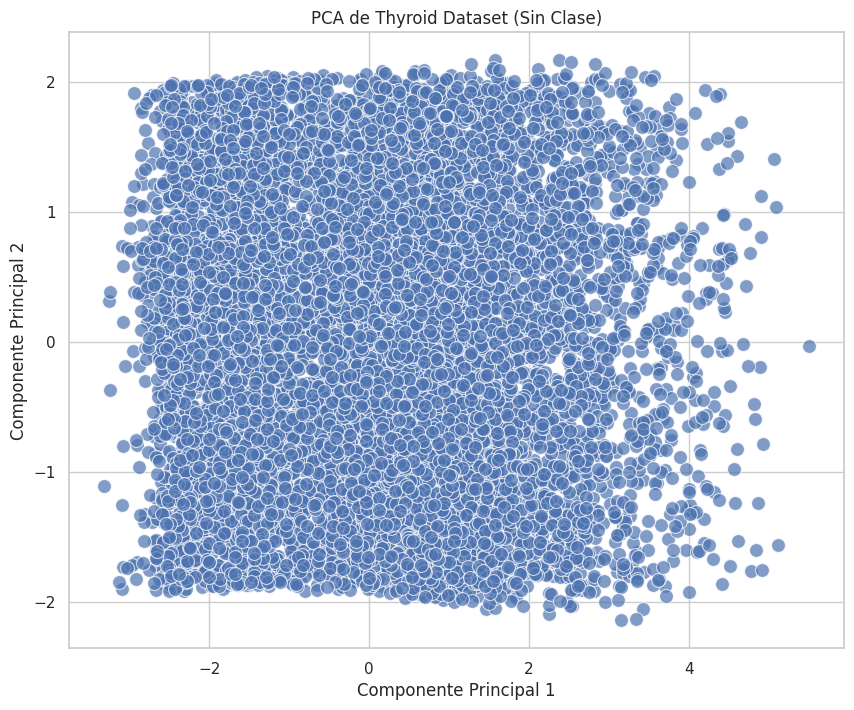

In [70]:
# Obtener el porcentaje de varianza explicada
varianza_explicada = pca.explained_variance_ratio_
print("\nVarianza explicada por cada componente:")
for i, var in enumerate(varianza_explicada, start=1):
    print(f"PC{i}: {var*100:.2f}%")

# Visualizar los Resultados
# Visualización de las Componentes Principales
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', data=final_df, s=100, alpha=0.7)
plt.title('PCA de Thyroid Dataset (Sin Clase)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

Ahora vamos a dibujar los Vectores (Cargas) de las Variables Originales

In [71]:
# Obtener las cargas (vectores propios)
cargas = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame para las cargas
cargas_df = pd.DataFrame(cargas, index=numerical_cols, columns=['PC1', 'PC2', 'PC3'])

print("\nCargas de las variables en las componentes principales:")
cargas_df


Cargas de las variables en las componentes principales:


,PC1,PC2,PC3
Edad,0.906005,0.034086,-0.265799
Family_Size,-0.388156,-0.008582,0.558196
anno_nacimiento,-0.906309,-0.034472,0.265345
Ingresos anuales brutos,0.776494,-0.046835,0.398631
Gasto_medio_mensual_cuota,0.627945,-0.051514,0.618355
Abandono,0.022010,0.775037,0.045868
Dias_cliente,0.017782,-0.776071,-0.048929


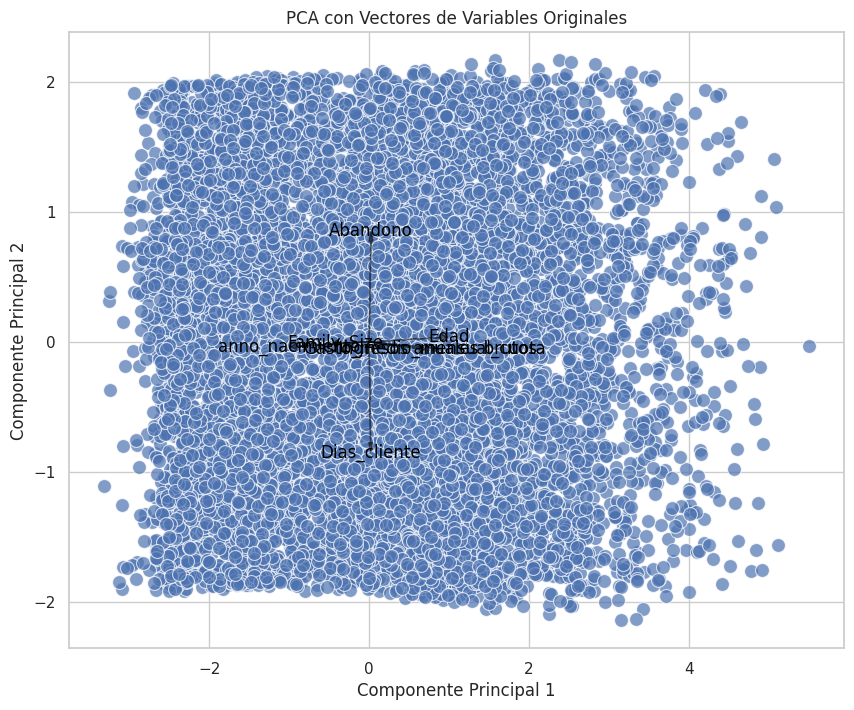

In [72]:
# Dibujar los vectores
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', data=final_df, s=100, alpha=0.7)

for var in numerical_cols:
    plt.arrow(0, 0, cargas_df.loc[var, 'PC1'], cargas_df.loc[var, 'PC2'], 
              color='black', alpha=0.5, head_width=0.05)
    plt.text(cargas_df.loc[var, 'PC1']*1.1, cargas_df.loc[var, 'PC2']*1.1, 
             var, color='black', ha='center', va='center')

plt.title('PCA con Vectores de Variables Originales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

Por las cargas, podemos ver que:

- PCA1 (40%): Edad (90%), anno_nacimiento (-90%), Ingresos anuales brutos (77%) y Gasto medio mensual cuota (62%), lo que nos da a entender que esta componente esta muy relacionada con factores demograficos y financieros.

- PCA2 (17%): Dominan Abandono (77%) y Dias_cliente (-77%) de manera opuesta, por lo que podemos suponer que esta componente representa la retencion del cliente.

- PCA3 (14%): Family_Size (56%) y Gasto medio mensual cuota (60%), y los Ingresos anuales brutos (40%) también es relevante, aunque no tanto como las anteriores. Esto nos puede indicar que se relaciona con el tamaño familiar y los gastos, reflejando patrones de gasto según el tamaño del hogar.